<a href="https://colab.research.google.com/github/williamSmithers/Python_Projects/blob/main/Wiki_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 style='text-align:center;font-size:36px;color:#333;background-color:white;padding:10px;border-radius:5px;'><b>Wiki Web Scraping 🌐 and EDA 📊📈</b></h1><br>


<div style="background-color:lightblue;
            border-radius: 7px;
            padding: 21px;
            font-size: 18px;
            font-family: 'Roboto', sans-serif;
            line-height: 1.7em;">
    <p style="color:white">
        Welcome to my Data Analysis Notebook!<br>
        In this project, we will explore and analyze tabular data scraped from Wikipedia. We will perform exploratory data analysis (EDA) and visualization to gain insights into the dataset. Additionally, we will assess the correlation between the features in the tables to understand how they are related.<br>
    </p>
</div>


### **The table for this data can be found on [Wikipedia](https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue)**



# <center><div style="font-family: 'Roboto', sans-serif;"><b> 📚 Introduction  </b></div></center>

<div style='border: 3px solid gold; border-top: none; padding: 10px;'>
    <p>In this dataset, we analyze various factors related to companies' financial and operational characteristics to gain insights into their performance. The data includes information such as the company's name, industry, revenue, profit, number of employees, headquarters location, state ownership, and profit percent.</p>
    <p>Due to the limited size of the data, we'll simply focus on performing exploratory data analysis (EDA) and analyzing the relationships between these features.</p>
    <p><span style='color: #F05B02;'><b>Key Attributes:</b></span></p>
    <ul>
        <li><b style='background-color: #fff44f'>Name: The name of the company.</b></li>
        <li><b style='background-color: #fff44f'>Industry: The industry to which the company belongs.</b></li>
        <li><b style='background-color: #fff44f'>Revenue (millions): The company's annual revenue in millions of dollars.</b></li>
        <li><b style='background-color: #fff44f'>Profit (millions): The company's annual profit in millions of dollars.</b></li>
        <li><b style='background-color: #fff44f'>Employees: The number of employees in the company.</b></li>
        <li><b style='background-color: #fff44f'>Headquarters: The location of the company's headquarters.</b></li>
        <li><b style='background-color: #fff44f'>State-owned: Indicates whether the company is state-owned (Yes/No).</b></li>
        <li><b style='background-color: #fff44f'>Profit Percent: The percentage of profit relative to revenue.</b></li>
    </ul>
</div>



# <center><div style="font-family: 'Roboto', sans-serif;font-size: 28px"><b> Scraping the data 🚀  </b></div></center>

> ### **Method 1: Scraping the data using `read_html()` from `pandas`**

In [ ]:
import pandas as pd

# Define the URL of the web page containing the table
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue'

# Use pandas' read_html() function to extract tables from the URL
tables = pd.read_html(url, header = 1)

df = tables[0]
df.index += 1

df


,Rank,Name,Industry,USD millions,USD millions.1,Employees,Headquarters[note 1],State-owned,Ref.
1,1,Walmart,Retail,"$611,289","$11,680",2100000,United States,NaN,[1]
2,2,Saudi Aramco,Oil and gas,"$603,651","$159,069",70496,Saudi Arabia,NaN,[4]
3,3,State Grid Corporation of China,Electricity,"$530,009","$8,192",870287,China,NaN,[5]
4,4,Amazon,Retail,"$513,983","−$2,722",1541000,United States,NaN,[6]
5,5,Vitol,Commodities,"$505,000","$15,000",1560,Switzerland,NaN,[7][8]
6,6,China National Petroleum Corporation,Oil and gas,"$483,019","$21,080",1087049,China,NaN,[9]
7,7,China Petrochemical Corporation,Oil and gas,"$471,154","$9,657",527487,China,NaN,[10]
8,8,ExxonMobil,Oil and gas,"$413,680","$55,740",63000,United States,NaN,[11]
9,9,Apple,Electronics,"$394,328","$99,803",164000,United States,NaN,[12]
10,10,Shell,Oil and gas,"$386,201","$20,120",93000,United Kingdom,NaN,[13]


<div style='border: 3px solid brown; background-color: lightyellow; padding: 10px;'>
        <span style='color: #F05B02;'>
            <b>The issue with using the <code>read_html()</code> method is that it doesn't capture one of the columns properly, and that's because the column doesn't use text but instead images that are referenced to either be a 'correct tick' (yes) or a 'wrong tick' (no).</b>
        </span>
        <b>And with something like that, the HTML reader can't parse the column correctly, leaving us with <strong>NaN</strong> values in there.</b>
    <b>The nature of the values in that column look like this:</b>
</div>

```html
      <!-- Structure for a 'Yes' tag -->
      <td data-sort-value="Yes" style="background: #DFD; vertical-align: middle; text-align: center;" class="table-yes2">…</td>

    <!-- Structure for a 'No' tag -->
    <td data-sort-value="No" style="background: #FFE3E3; vertical-align: middle; text-align: center;" class="table-no2">…</td>

```

<div style='border: 3px solid brown; background-color: lightyellow; padding: 10px;'>
        <b>The <code>read_html()</code> method isn't capable of parsing such content, and so we'll have a hard time retrieving the entries of the columns this way.</b>
        <b>To fix this, we'll use manual scraping.</b>
</div>



> ### **Method 2: Scraping the data using `BeautifulSoup()` from `bs4` and `requests`**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
pd.set_option('display.max_rows', 10)

# Fetch the HTML page
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue'
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find_all('table')[0]

data = []

# Find all table rows
for row in table.find_all('tr'):
    cols = row.find_all('td')

    cols_data = []

    for col in cols:
        # Check if the column has 'data-sort-value' attribute
        if col.has_attr('data-sort-value'):
            # Append the attribute value to the columns list
            cols_data.append(col['data-sort-value'])
        else:
            # Append the text inside the column to the columns list
            cols_data.append(col.text.strip())


    data.append(cols_data)


In [ ]:
title_array = []

for titles in table.find_all('th')[:10]:
    title_array.append(titles.text.strip())

title_array.pop()
title_array.remove('Rank')
title_array

['Name',
 'Industry',
 'Revenue',
 'Profit',
 'Employees',
 'Headquarters[note 1]',
 'State-owned',
 'Ref.']

In [ ]:
company_df = pd.DataFrame(columns = title_array)


for array in data[2:]:
    length = len(company_df)
    company_df.loc[length] = array

company_df.index += 1

company_df.drop('Ref.', axis = 1, inplace = True)  # Dropping unnecessary column
company_df.rename_axis('Rank', inplace = True)     # Rename the index
company_df.head(10)

,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1],State-owned
Rank,,,,,,,
1,Walmart,Retail,"$611,289","$11,680","2,100,000",United States,No
2,Saudi Aramco,Oil and gas,"$603,651","$159,069","70,496",Saudi Arabia,Yes
3,State Grid Corporation of China,Electricity,"$530,009","$8,192","870,287",China,Yes
4,Amazon,Retail,"$513,983","−$2,722","1,541,000",United States,No
5,Vitol,Commodities,"$505,000","$15,000","1,560",Switzerland,No
6,China National Petroleum Corporation,Oil and gas,"$483,019","$21,080","1,087,049",China,Yes
7,China Petrochemical Corporation,Oil and gas,"$471,154","$9,657","527,487",China,Yes
8,ExxonMobil,Oil and gas,"$413,680","$55,740","63,000",United States,No
9,Apple,Electronics,"$394,328","$99,803","164,000",United States,No


# <center><div style="font-family: 'Roboto', sans-serif; font-size: 28px;"><b> 📄 Exploratory Data Analysis and Wrangling 🕵️‍ </b></div></center>

> ## **Generating Summary Statistics and getting an overview of the data**

In [ ]:
#Importing visualization and stats summary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

company_df.info()

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  50 non-null     object
 1   Industry              50 non-null     object
 2   Revenue               50 non-null     object
 3   Profit                50 non-null     object
 4   Employees             50 non-null     object
 5   Headquarters[note 1]  50 non-null     object
 6   State-owned           50 non-null     object
dtypes: object(7)
memory usage: 3.1+ KB


/tmp/ipykernel_20/4093299161.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
company_df.describe()

,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1],State-owned
count,50,50,50,50,50,50,50
unique,50,13,50,48,50,13,2
top,Walmart,Oil and gas,"$611,289",...,"2,100,000",United States,No
freq,1,13,1,2,1,20,35


In [ ]:
company_df.head()

,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1],State-owned
Rank,,,,,,,
1,Walmart,Retail,"$611,289","$11,680","2,100,000",United States,No
2,Saudi Aramco,Oil and gas,"$603,651","$159,069","70,496",Saudi Arabia,Yes
3,State Grid Corporation of China,Electricity,"$530,009","$8,192","870,287",China,Yes
4,Amazon,Retail,"$513,983","−$2,722","1,541,000",United States,No
5,Vitol,Commodities,"$505,000","$15,000","1,560",Switzerland,No


<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px;'>
    <p>
        <b>All the data was collected as strings, including the numerical data. To make this data useful for visualization, all the numeric data needs to be converted into numbers, and the rest of the data and columns formatted appropriately.</b>
    </p>
</div>


In [ ]:
#converting Revenue column to numeric
company_df['Revenue'] = company_df['Revenue'].str.replace('$', '').str.replace(',', '').astype('int')

company_df['Profit'] = company_df['Profit'].str.replace('−', '-').str.replace('—', '-').str.replace('–', '-').str.replace('$', '').str.replace(',', '')
company_df['Profit'] = pd.to_numeric(company_df['Profit'], errors = 'coerce')

company_df['Employees'] = company_df['Employees'].str.replace(',', '').astype('int')


company_df['Revenue'].dtype, company_df['Profit'].dtype, company_df['Employees'].dtype

(dtype('int64'), dtype('float64'), dtype('int64'))

In [ ]:
company_df.rename(columns = {'Revenue': 'Revenue ($ millions)',
                             'Profit': 'Profit ($ millions)',
                            'Headquarters[note 1]': 'Headquarters'}, inplace = True)

company_df.head()

,Name,Industry,Revenue ($ millions),Profit ($ millions),Employees,Headquarters,State-owned
Rank,,,,,,,
1,Walmart,Retail,611289,11680.0,2100000,United States,No
2,Saudi Aramco,Oil and gas,603651,159069.0,70496,Saudi Arabia,Yes
3,State Grid Corporation of China,Electricity,530009,8192.0,870287,China,Yes
4,Amazon,Retail,513983,-2722.0,1541000,United States,No
5,Vitol,Commodities,505000,15000.0,1560,Switzerland,No


In [ ]:
company_df['Profit Percent'] = (company_df['Profit ($ millions)'] / company_df['Revenue ($ millions)']) * 100

company_df.head()

,Name,Industry,Revenue ($ millions),Profit ($ millions),Employees,Headquarters,State-owned,Profit Percent
Rank,,,,,,,,
1,Walmart,Retail,611289,11680.0,2100000,United States,No,1.910717
2,Saudi Aramco,Oil and gas,603651,159069.0,70496,Saudi Arabia,Yes,26.351153
3,State Grid Corporation of China,Electricity,530009,8192.0,870287,China,Yes,1.545634
4,Amazon,Retail,513983,-2722.0,1541000,United States,No,-0.529590
5,Vitol,Commodities,505000,15000.0,1560,Switzerland,No,2.970297


<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px;'>
    <p>
        <b>To obtain a more comprehensive idea of the shape and breadth of our data, we can use <code>Pandas Profiling</code> to generate a summary report</b>
    </p>
</div>


In [ ]:
report = ProfileReport(company_df, title = "Comprehensive Summary of the Companies' data")

report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div style="border: 2px solid #3E7E96; background-color: #F1F1F1; border-radius: 7px; padding: 10px;">
    <h1 style="color: #3E7E96; font-size: 20px;">Understanding Features</h1>
    <table style="font-size: 15px; width: 100%; border-collapse: collapse;">
        <thead>
            <tr>
                <th style="background-color: #3E7E96; color: white; padding: 8px;">Column</th>
                <th style="background-color: #3E7E96; color: white; padding: 8px;">Non-Null Count</th>
                <th style="background-color: #3E7E96; color: white; padding: 8px;">Dtype</th>
                <th style="background-color: #3E7E96; color: white; padding: 8px;">Explanation</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Name</td>
                <td>50</td>
                <td>object</td>
                <td>The name of the company.</td>
            </tr>
            <tr>
                <td>Industry</td>
                <td>50</td>
                <td>object</td>
                <td>The industry to which the company belongs.</td>
            </tr>
            <tr>
                <td>Revenue</td>
                <td>50</td>
                <td>int64</td>
                <td>The revenue of the company in millions of dollars.</td>
            </tr>
            <tr>
                <td>Profit</td>
                <td>50</td>
                <td>float64</td>
                <td>The profit of the company in millions of dollars.</td>
            </tr>
            <tr>
                <td>Employees</td>
                <td>50</td>
                <td>int64</td>
                <td>The number of employees in the company.</td>
            </tr>
            <tr>
                <td>Headquarters</td>
                <td>50</td>
                <td>object</td>
                <td>The location of the company's headquarters.</td>
            </tr>
            <tr>
                <td>State-owned</td>
                <td>50</td>
                <td>object</td>
                <td>Indicates whether the company is state-owned (Yes/No).</td>
            </tr>
            <tr>
                <td>Percentage Profit</td>
                <td>50</td>
                <td>float64</td>
                <td>The profit expressed as a proportion of the revenue</td>
            </tr>
        </tbody>
    </table>
</div>


### **obtaining the location of each company**

In [ ]:
country_stats = company_df.groupby('Headquarters')['Name'].unique()

for country, companies in zip(country_stats.index, country_stats.values):
    print(country, '\t->\t', companies, '\n\n')

len(country_stats)

China 	->	 ['State Grid Corporation of China' 'China National Petroleum Corporation'
 'China Petrochemical Corporation' 'China State Construction Engineering'
 'Industrial and Commercial Bank of China' 'China Construction Bank'
 'Agricultural Bank of China' 'Ping An Insurance' 'Sinochem'
 'China Railway Engineering Corporation'
 'China National Offshore Oil Corporation'
 'China Railway Construction Corporation' 'Baowu'] 


France 	->	 ['TotalEnergies'] 


Germany 	->	 ['Volkswagen Group' 'Uniper' 'Schwarz Gruppe' 'Mercedes-Benz Group'] 


Japan 	->	 ['Toyota' 'Mitsubishi Group'] 


Netherlands 	->	 ['Stellantis'] 


Russia 	->	 ['Gazprom'] 


Saudi Arabia 	->	 ['Saudi Aramco'] 


Singapore 	->	 ['Trafigura'] 


South Korea 	->	 ['Samsung Electronics'] 


Switzerland 	->	 ['Vitol' 'Glencore'] 


Taiwan 	->	 ['Foxconn'] 


United Kingdom 	->	 ['Shell' 'BP'] 


United States 	->	 ['Walmart' 'Amazon' 'ExxonMobil' 'Apple' 'UnitedHealth Group' 'CVS Health'
 'Berkshire Hathaway' 'Alphabet' 'M

13

<div style="border: 3px solid #9B9B9B; background-color: #F1F1F1; border-radius: 7px; padding: 10px;">
    <h1 style="color: #3E7E96; font-size: 20px;">Distribution of Companies Across Countries</h1>
    <table style="font-size: 15px;">
        <tr>
            <th>Country</th>
            <th>Companies</th>
        </tr>
        <tr>
            <td>China</td>
            <td>State Grid Corporation of China, China National Petroleum Corporation,
                China Petrochemical Corporation, China State Construction Engineering,
                Industrial and Commercial Bank of China, China Construction Bank,
                Agricultural Bank of China, Ping An Insurance Sinochem,
                China Railway Engineering Corporation,
                China National Offshore Oil Corporation,
                China Railway Construction Corporation Baowu</td>
        </tr>
        <tr>
            <td>France</td>
            <td>TotalEnergies</td>
        </tr>
        <tr>
            <td>Germany</td>
            <td>Volkswagen Group, Uniper Schwarz Gruppe, Mercedes-Benz Group</td>
        </tr>
        <tr>
            <td>Japan</td>
            <td>Toyota, Mitsubishi Group</td>
        </tr>
        <tr>
            <td>Netherlands</td>
            <td>Stellantis</td>
        </tr>
        <tr>
            <td>Russia</td>
            <td>Gazprom</td>
        </tr>
        <tr>
            <td>Saudi Arabia</td>
            <td>Saudi Aramco</td>
        </tr>
        <tr>
            <td>Singapore</td>
            <td>Trafigura</td>
        </tr>
        <tr>
            <td>South Korea</td>
            <td>Samsung Electronics</td>
        </tr>
        <tr>
            <td>Switzerland</td>
            <td>Vitol Glencore</td>
        </tr>
        <tr>
            <td>Taiwan</td>
            <td>Foxconn</td>
        </tr>
        <tr>
            <td>United Kingdom</td>
            <td>Shell BP</td>
        </tr>
        <tr>
            <td>United States</td>
            <td>Walmart, Amazon, ExxonMobil, Apple, UnitedHealth Group, CVS Health,
                Berkshire Hathaway, Alphabet, McKesson, Chevron , Amerisource Bergen,
                Costco, Microsoft, Cardinal Health, Cigna, Marathon Petroleum,
                Phillips, 66 Valero Energy, Cargill, Ford Motor Company</td>
        </tr>
    </table>
</div>


# <center><div style="font-family: 'Roboto', sans-serif; font-size: 28px;"><b> Visualizations 📈📊 </b></div></center>

<div style='border: 3px solid brown; font-size: 20px; background-color: lightyellow; padding: 10px;'>
    Visualizing the profits of various companies with a horizontal bar plot. Companies are sorted by profit in descending order and represented with custom colors. Data labels on the bars display the profit values. A clear view of each company's profitability.
</div>


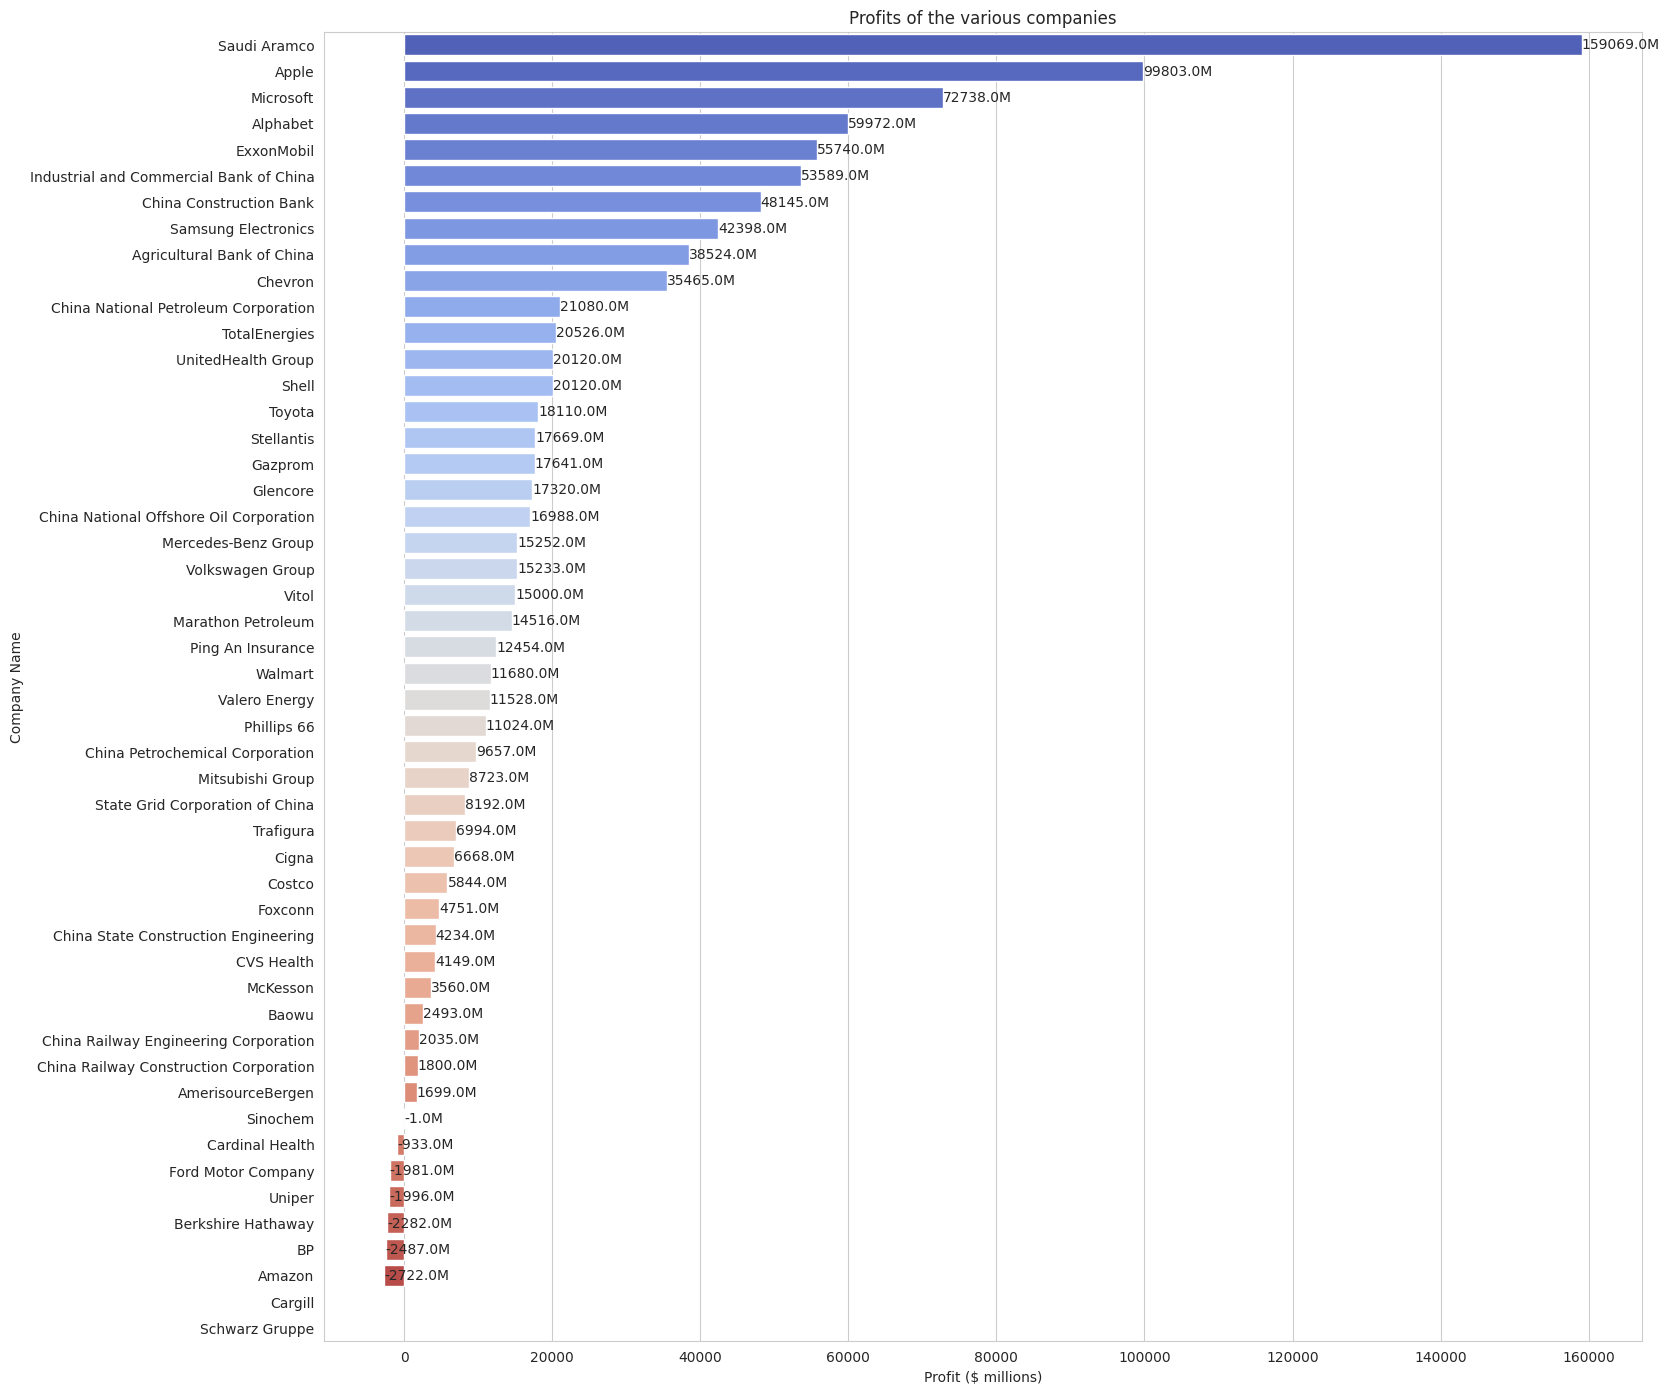

In [ ]:
# Set the Seaborn style to white background
sns.set_style("whitegrid")

# Sort the DataFrame by profit in descending order for a better visualization
company_df_sorted = company_df.sort_values(by='Profit ($ millions)', ascending=False)

# Create a horizontal bar plot with custom colors
plt.figure(figsize=(17, 17))
colors = sns.color_palette("coolwarm", len(company_df_sorted))
ax = sns.barplot(x='Profit ($ millions)', y='Name', data=company_df_sorted, palette=colors)

# Add data labels to the bars (simplified)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.1f}M', (width, p.get_y() + p.get_height() / 2), va='center')

plt.title('Profits of the various companies')
plt.xlabel('Profit ($ millions)')
plt.ylabel('Company Name')
plt.show()

<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px;'>
    <p>The horizontal bar plot illustrates the profits of various companies, showcasing their financial performance. The data reveals the profitability of each company in millions of dollars. Notably, companies like Apple, Alphabet, and Microsoft stand out with substantial profits, while others like Amazon and Walmart also make a significant mark in the financial landscape.</p>
    <p>On the flip side, some companies, including Cigna and ExxonMobil, show substantial profits, whereas a few others, like Foxconn and Gazprom, hold their own in the profit margin. The plot provides a comprehensive view of the financial success of these prominent companies, with varying degrees of profitability.
    The negative profit values, such as Amazon and BP, indicate losses in the respective fiscal years. This visualization offers a clear perspective on the diverse financial performance of these industry giants.</p>
</div>


<div style='border: 3px solid brown; font-size: 20px; background-color: lightyellow; padding: 10px;'>
    Visualizing the distribution of company headquarters with a pie chart. The chart is colorfully segmented to represent different headquarters
</div>


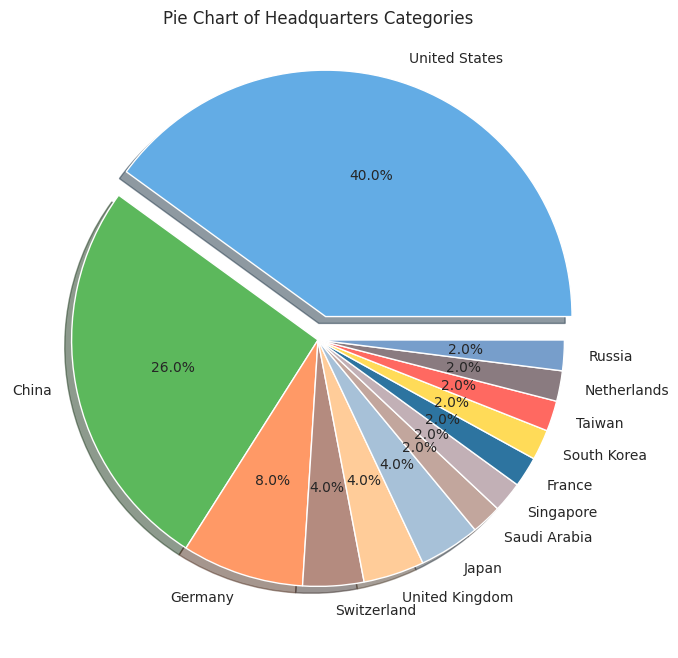

In [ ]:
#plot for unique countries
def cat_pie_plot(category, colors, title):
    categories = company_df[category].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(categories, labels=categories.index, autopct='%1.1f%%', colors=colors, shadow=True, explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))
    plt.title(title)
    plt.tight_layout
    plt.show()

cat_pie_plot('Headquarters', colors = ['#63ace5', '#5cb85c', '#ff9966', '#b48b7f', '#ffcc99', '#a7c1d8', '#c2a69d', '#c2b0b6', '#2d74a0', '#ffdb58', '#ff6961', '#8a7b80', '#779ecb'],
            title = 'Pie Chart of Headquarters Categories')

<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px;'>
    The distribution of company headquarters reveals a varied landscape of prominent business centers worldwide. The United States takes the lead with a substantial presence of 20 companies, showcasing its significance in the global corporate arena.
    China follows closely, with 13 companies contributing to its growing influence in the corporate world. Germany, Switzerland, the United Kingdom, Japan, and several other countries each host a noteworthy number of companies.
    This distribution underlines the global nature of these corporations and their impact on different regions, contributing to economic and industrial diversity. Each location represents a unique hub for business operations, reflecting the dynamic and interconnected nature of the global economy.
</div>


<div style='border: 3px solid brown; font-size: 20px; background-color: lightyellow; padding: 10px;'>
    Visualizing the distribution of companies across different industries with a colorful pie chart. Each segment represents a unique industry category, providing valuable insights into the industry composition.
</div>


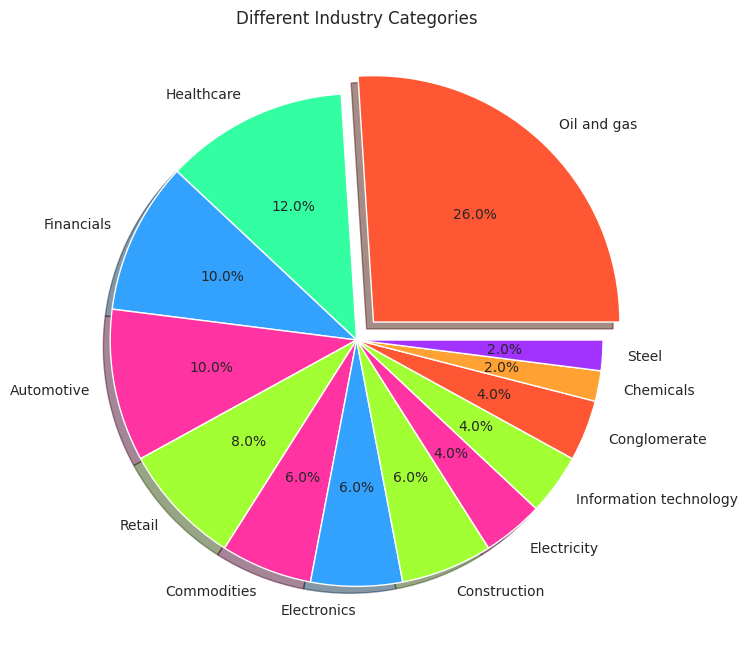

In [ ]:
cat_pie_plot('Industry', colors = ['#FF5733', '#33FFA2', '#33A2FF', '#FF33A2', '#A2FF33', '#FF33A2', '#33A2FF', '#A2FF33', '#FF33A2', '#A2FF33', '#FF5733', '#FFA233', '#A233FF']
, title = 'Different Industry Categories')

<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px;'>    <p>The data highlights the diverse landscape of industries represented by these prominent companies. Oil and gas lead with 13 companies, emphasizing the significance of the energy sector.</p>
   <p> Healthcare follows closely, with six companies showcasing the importance of the healthcare and pharmaceutical industry. Financials and automotive sectors each boast five major companies, underlining their substantial presence in the corporate world.</p>
   <p> Other industries such as retail, commodities, electronics, and construction also feature prominently. This variety of industries demonstrates the global economic impact of these corporations, contributing to multiple sectors and reflecting the complexity of the business world.</p>
</div>


<div style='border: 3px solid brown; background-color: lightyellow; padding: 10px; font-size: 20px;'>
   <p> Exploring the distribution of employee numbers, this KDE (Kernel Density Estimation) plot provides insights into the workforce of these companies. With a soothing green palette, it visualizes the density of employee counts.</p>
   <p> The x-axis represents the number of employees, while the y-axis portrays the density of each count. The peak regions indicate where the majority of companies fall in terms of their workforce size.</p>
   <p> As a vital aspect of any organization, this plot sheds light on the diversity of employee numbers across the dataset, revealing the varied staffing levels of these major companies.</p>
</div>


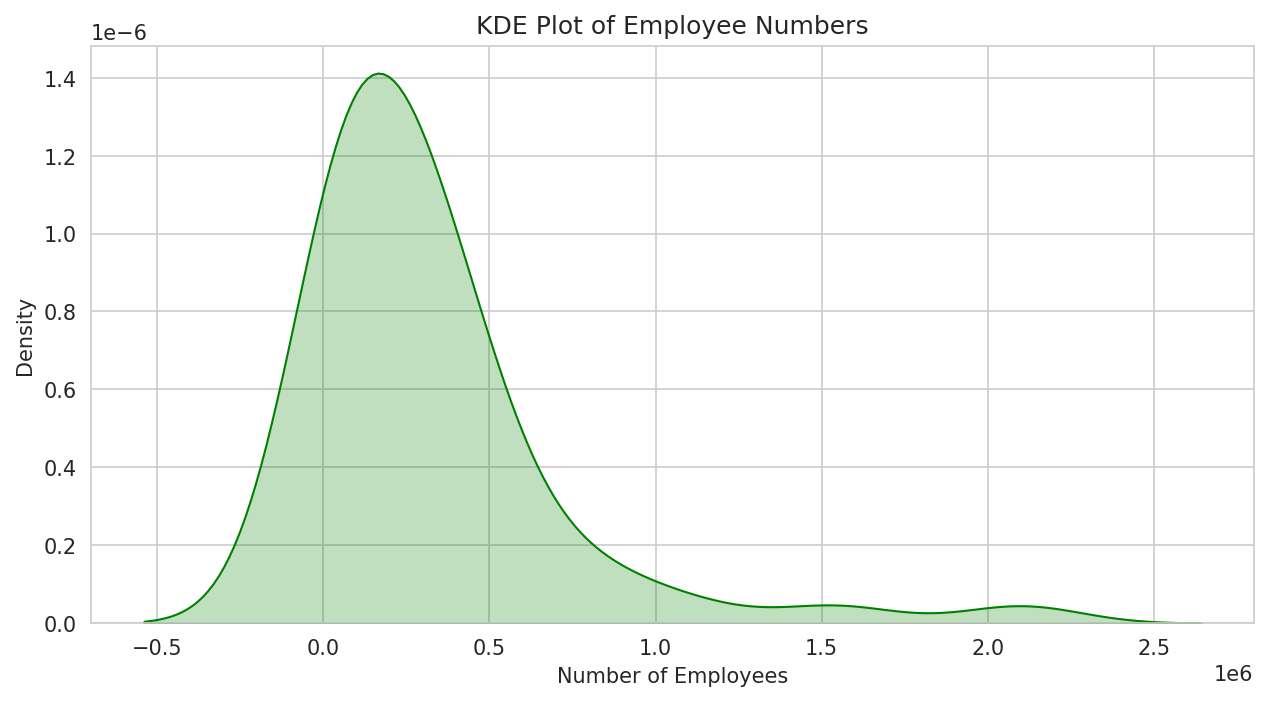

In [ ]:
# Set the Seaborn style
sns.set_style("whitegrid")

# Create a KDE plot for 'Employees'
plt.figure(dpi = 150, figsize=(10, 5))
sns.kdeplot(company_df['Employees'], color='green', fill=True)
plt.xlabel('Number of Employees')
plt.ylabel('Density')
plt.title('KDE Plot of Employee Numbers')

plt.show()


<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px;'>    <p> This data showcases the employee counts of various influential companies, providing a closer look at their workforce scale. Observing the figures, we can discern significant variations in employee numbers.<\p>

   <p> Some companies, like Walmart, employ a vast number of people, exceeding 2 million employees, while others, such as Uniper, maintain a considerably smaller workforce with around 7,000 employees.<\p>

  <p>The diversity in employee counts across these companies is evident, reflecting the distinct organizational structures and operational requirements within each corporation. This data enables us to appreciate the breadth of workforce sizes among these influential entities, offering valuable insights into their economic impact and global presence.<\p>
</div>


<div style='border: 3px solid brown; font-size: 20px; background-color: lightyellow; padding: 10px;'>
    Visualizing the distribution of percentage profits of companies with a soothing violin plot.
</div>


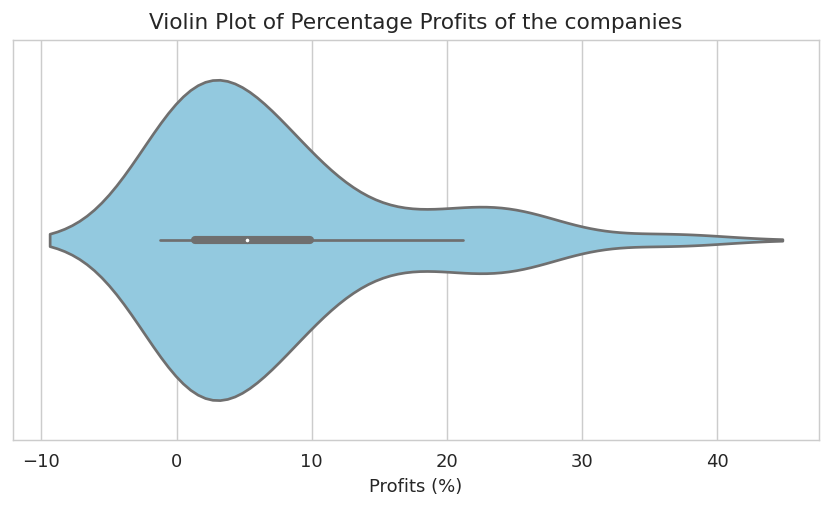

In [ ]:
# Set the Seaborn style
sns.set_style("whitegrid")

# Create a violin plot for 'Employees'
plt.figure(dpi = 130, figsize=(8, 4))
sns.violinplot(x=company_df['Profit Percent'], color='skyblue')
plt.xlabel('Profits (%)')
plt.title('Violin Plot of Percentage Profits of the companies')
plt.show()



<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px;'>
   <p> This violin plot visualizes the profits of influential companies, providing a comprehensive overview of their financial performance. Each company's profit, measured in millions, is depicted as a distribution, allowing us to observe both the central tendency and the spread of profits.</p>

   <p> Notable companies like Alphabet and Microsoft showcase positive profits, emphasizing their financial strength. Conversely, Amazon and Uniper display negative profits, indicating financial challenges.</p>

   <p> Some companies, such as Apple and Saudi Aramco, demonstrate substantial profitability, while others, like Cargill, show NaN values, possibly due to missing or undisclosed financial data.</p>
    <p> The diversity in profit distributions highlights the financial landscape of these companies, offering valuable insights into their economic resilience and market standing.</p>
</div>


<Figure size 2000x1200 with 0 Axes>

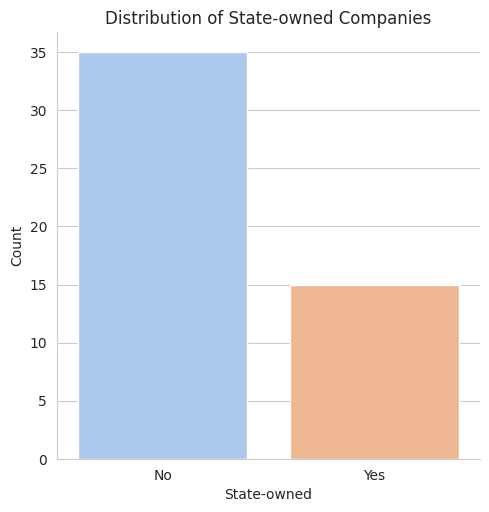

In [ ]:
import warnings

# Suppress the tight layout warning
warnings.filterwarnings("ignore", category=UserWarning)

# Create a catplot for 'State-owned'
plt.figure(dpi=200, figsize=(10, 6))
sns.catplot(x='State-owned', kind='count', data=company_df, palette='pastel')
plt.xlabel('State-owned')
plt.ylabel('Count')
plt.title('Distribution of State-owned Companies')
plt.show()


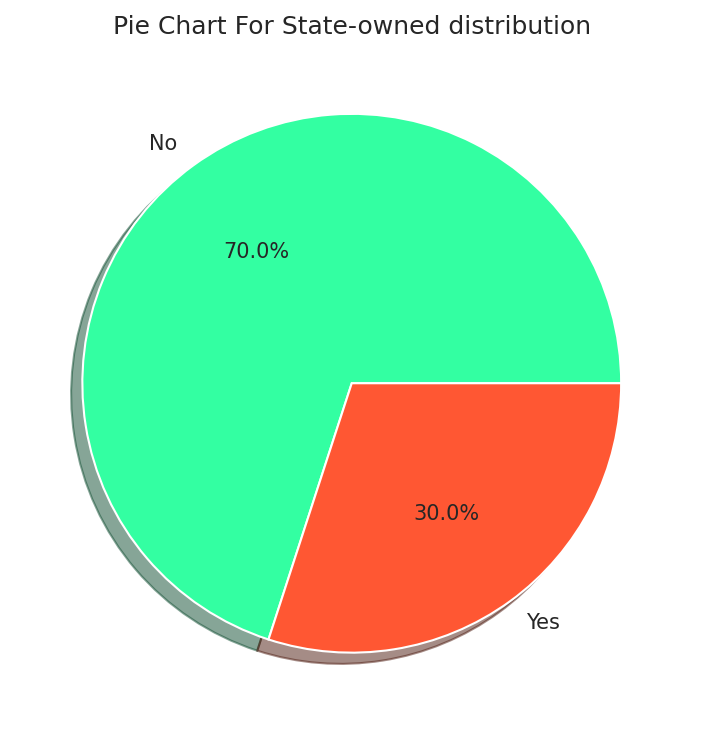

In [ ]:
plt.figure(dpi = 150, figsize = (10, 5))

categories = company_df['State-owned'].value_counts()
plt.pie(categories, labels = categories.index, autopct = '%1.1f%%', colors = ['#33FFA2', '#FF5733'], shadow = True)
plt.title('Pie Chart For State-owned distribution')
plt.tight_layout()

plt.show()



<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px;'>
    <p>
        From the categorical plot, it becomes obvious how the companies are distributed in this regard. We also apply a pie chart to illustrate the distribution of Yes No's with 70% of the companies being public companies and the remaining 30% falling under state-owned enterprises
            By examining this plot, we can identify revenue patterns, concentrations, and variations within the dataset, offering a valuable perspective on the financial health and diversity of these companies.
    </p>
    
</div>

<div style='border: 3px solid brown; background-color: lightyellow; padding: 10px; font-size: 18px;'>
    This histogram offers a visual representation of the distribution of company revenues, allowing us to gain insights into the financial landscape of these organizations. The x-axis represents revenue in millions, while the y-axis displays the frequency or the number of companies falling within specific revenue ranges.
    The sky-blue histogram bars reveal how the revenues are spread across the companies. The accompanying KDE (Kernel Density Estimation) curve provides a smooth, continuous representation of the revenue distribution, aiding in identifying trends and peaks in the data.
</div>


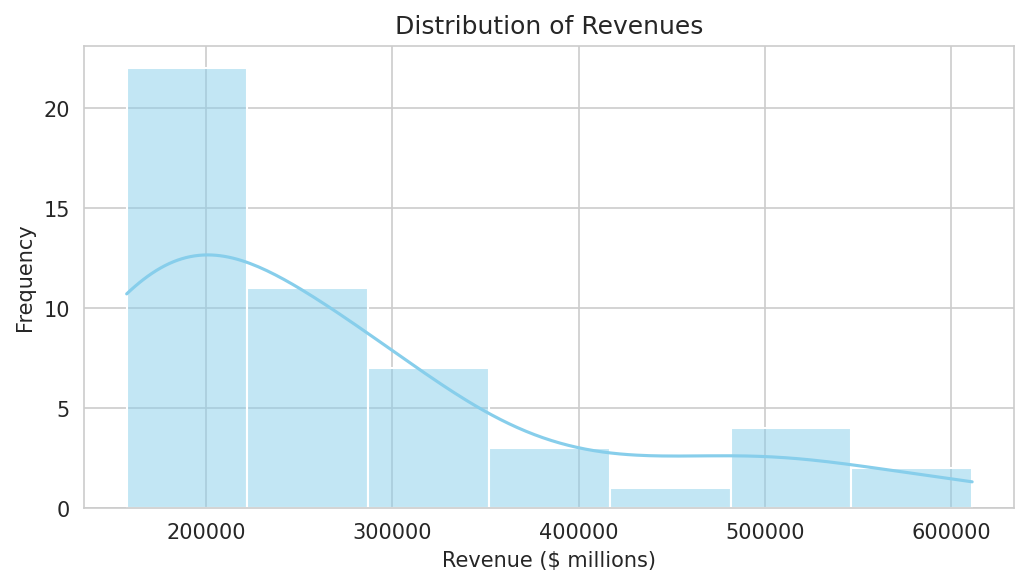

In [ ]:

# Create a histogram for 'Revenue ($ millions)'
plt.figure(dpi = 150, figsize=(8, 4))
sns.histplot(x='Revenue ($ millions)', data=company_df, kde=True, color='skyblue')
plt.xlabel('Revenue ($ millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Revenues')

plt.show()


<div style='border: 2px solid #3B87C6; font-size: 17px; background-color: #AED9E0; border-radius: 7px; padding: 10px;'>
    <p>This histogram visually demonstrates the distribution of revenues among a selection of prominent companies. Each bar represents a specific company, and its height corresponds to the revenue in millions of dollars. Examining the data, it's clear that some companies, such as Amazon, Apple, and Microsoft, are among the top earners, with revenues exceeding the half-billion mark. On the other hand, there are companies like Cargill, which have substantial revenues but fall below this threshold.</p>
    <p>Furthermore, this histogram provides insights into the diversity of revenue ranges within the dataset. Viewers can easily compare the revenue performance of various companies and identify those with exceptional financial success. By analyzing this plot, one can gain a visual understanding of how revenues are distributed across these enterprises, offering valuable insights into their financial prowess and market competitiveness.</p>
</div>


# <center><div style="font-family: 'Roboto', sans-serif; font-size: 28px;"><b> Assessing the relationship between variables 🔎 </b></div></center>

> #### **How are the values in the table related to each other linearly?**

<div style='border: 3px solid brown; background-color: lightyellow; padding: 10px; font-size: 20px;'>
    <b>Heatmap for the data</b>
</div>


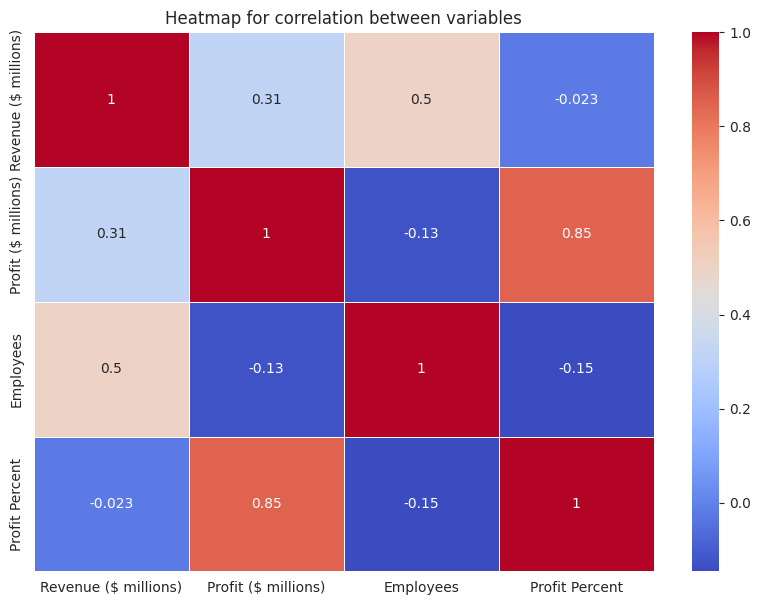

In [ ]:
corr_matrix = company_df.select_dtypes(include = ['number']).corr()

plt.figure(dpi = 100, figsize = (10, 7))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, linewidths = .5)
plt.title('Heatmap for correlation between variables')
plt.show()

<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px; font-size: 18px;'>    This correlation matrix provides insights into the relationships between key numerical variables.
    Notably, revenue and the number of employees show a moderate positive correlation,
    while profit and profit percentage have a strong positive correlation.
    However, profit and the number of employees exhibit a slight negative correlation,
    and revenue and profit percent have a very weak negative correlation.
</div>


<div style='border: 3px solid brown; background-color: lightyellow; padding: 10px; font-size: 20px;'>
    <b>Plot illustrating how Employee numbers vary with profit percent

</b>
</div>


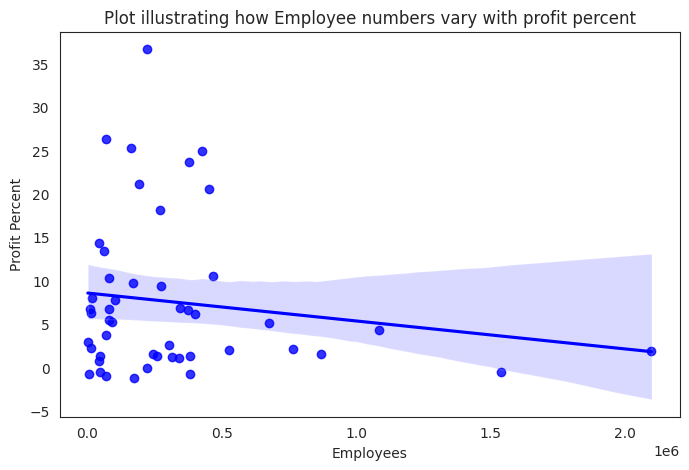

In [ ]:
#Regression Plot for data

sns.set_style('white')

plt.figure(figsize = (8, 5))
sns.regplot(x=company_df['Employees'], y=company_df['Profit Percent'], color = 'blue')
plt.title('Plot illustrating how Employee numbers vary with profit percent')
# Show the plot
plt.show()


<div style='border: 2px solid #3B87C6; font-size: 16px; background-color: #AED9E0; border-radius: 7px; padding: 10px; font-size: 18px;'>    From the plot, we can observe that the profit percentage varies inversely with the number of employees, which makes sense since companies should naturally have smaller profit margins when they have more employees
</div>


<div style='border: 3px solid brown; background-color: lightyellow; padding: 10px; font-size: 20px;'>
    <b>Plot illustrating how Employee numbers vary with profit percent w.r.t State Ownership

</b>
</div>


<Figure size 800x800 with 0 Axes>

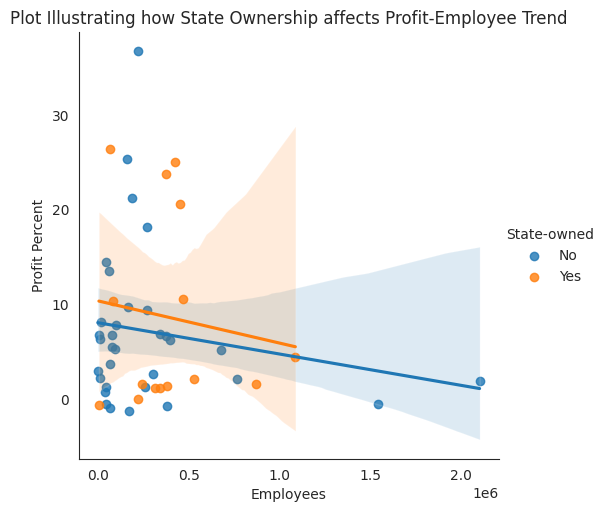

In [ ]:
plt.figure(figsize = (8, 8))
sns.lmplot(x = 'Employees', y = 'Profit Percent', hue = 'State-owned', data = company_df)
plt.title('Plot Illustrating how State Ownership affects Profit-Employee Trend')
plt.show()

<div style='border: 2px solid #3B87C6; font-size: 15px; background-color: #AED9E0; border-radius: 7px; padding: 10px; font-size: 18px;'>    As can be seen with the plot, the state-owned companies tend to have a very similar negative slope with the plot, meaning regardless of whether or not they're state-owned, the results will be the same; a negative correlation. Hence we can conclude that the condition of state-ownership doesn't have an effect on the relationship
</div>

> ### **Next Up**

<div style="background-color:blue;
            border-radius: 7px;
            padding: 21px;
            font-size: 18px;
            font-family: 'Roboto', sans-serif;
            line-height: 1.7em;">
    <p style="color:white">
        More improvements and updates to come!<br>
        If you have any recommendations or suggestions, please do well to share with me in the comments. Thanks 😊<br>
    </p>
</div>
